# 📊 **VERİ BİLİMİ FİNAL PROJESİ**
## **SOSYAL MEDYA VE ZİHİN SAĞLIĞI İLİŞKİSİ ARAŞTIRMASI**

---

> **DERS:** VERİ BİLİMİNE GİRİŞ

> **ÖĞRETİM ÜYESİ:** MUHAMMET SİNAN BAŞARSLAN

### 👥 **PROJE EKİBİ:**
* CEREN NAZ DERVİŞOĞLU-23120205058
* BETÜL TOK-25120205082
* ZEYNEP ASLI ÇAKMAK-25120205098
* GÜLSELİ OCAKCI-23120205042

---


Bu proje, günümüzün vazgeçilmezi olan sosyal medya kullanım alışkanlıklarının bireylerin stres seviyeleri, uyku kaliteleri ve genel mutluluk indeksleri üzerindeki doğrudan etkilerini modern veri bilimi teknikleriyle analiz etmektedir. Kullanıcı verileri üzerinden gerçekleştirilen bu çalışma, dijital maruziyetin mental sağlık üzerindeki izlerini sürerek literatür destekli risk analizleri ve yapay zeka tabanlı öngörüler sunmayı amaçlamaktadır.


####🛠️ Kütüphanelerin İçe Aktarılması

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from IPython.display import display, clear_output

# Görselleştirme ayarları
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

####📂 Veri Yükleme ve Ön İşleme

Veriyi okuyor, yapısal özelliklerini inceliyor ve analiz için hazırlıyoruz.

In [2]:
# Veriyi yükleme
df = pd.read_csv('MentalHealthSocialMediaBalance.csv')

# İlk 5 satır ve veri bilgisi
print("Veri Seti Bilgisi:")
df.info()
display(df.head())

# Eksik değer kontrolü
print("\nEksik Değer Sayısı:", df.isnull().sum().sum())

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0



Eksik Değer Sayısı: 0


####📝 Ön İşleme Gözlemi

Veri setimiz 500 kullanıcıdan oluşmaktadır. Eksik değer bulunmamaktadır. Veri seti; demografik bilgiler (Yaş, Cinsiyet), kullanım verileri (Ekran Süresi, Sosyal Medya Platformu) ve sağlık metriklerini (Uyku, Stres, Mutluluk) içermektedir.

##📈 1. Veri Yoğunluk Grafikleri
Veri setindeki sayısal değişkenlerin genel dağılımını anlamak için yoğunluk grafiklerini çiziyoruz.

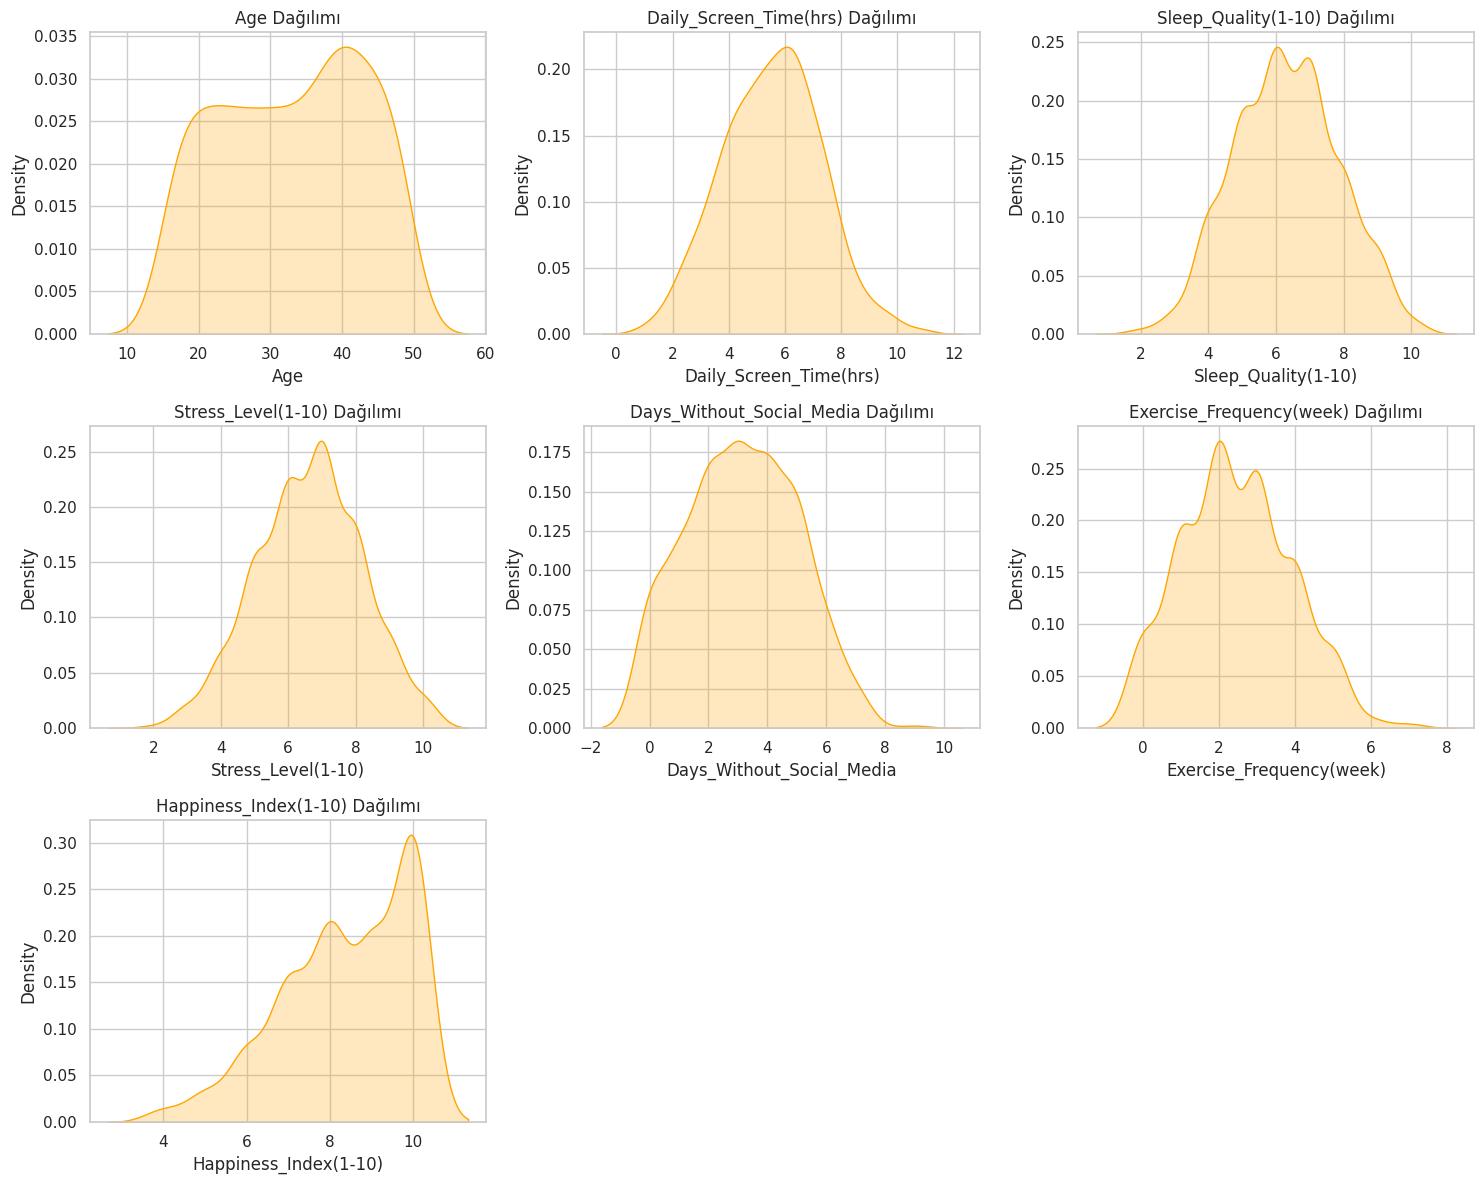

In [3]:
# Sayısal sütunları seçiyoruz
num_cols = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
            'Stress_Level(1-10)', 'Days_Without_Social_Media',
            'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i], color='orange')
    axes[i].set_title(f'{col} Dağılımı')

# Boş kalan subplotları kaldır
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##🔗 2. Sayısal Veriler Arası Korelasyon

Değişkenler arasındaki doğrusal ilişkileri bir ısı haritası (heatmap) üzerinden inceliyoruz.

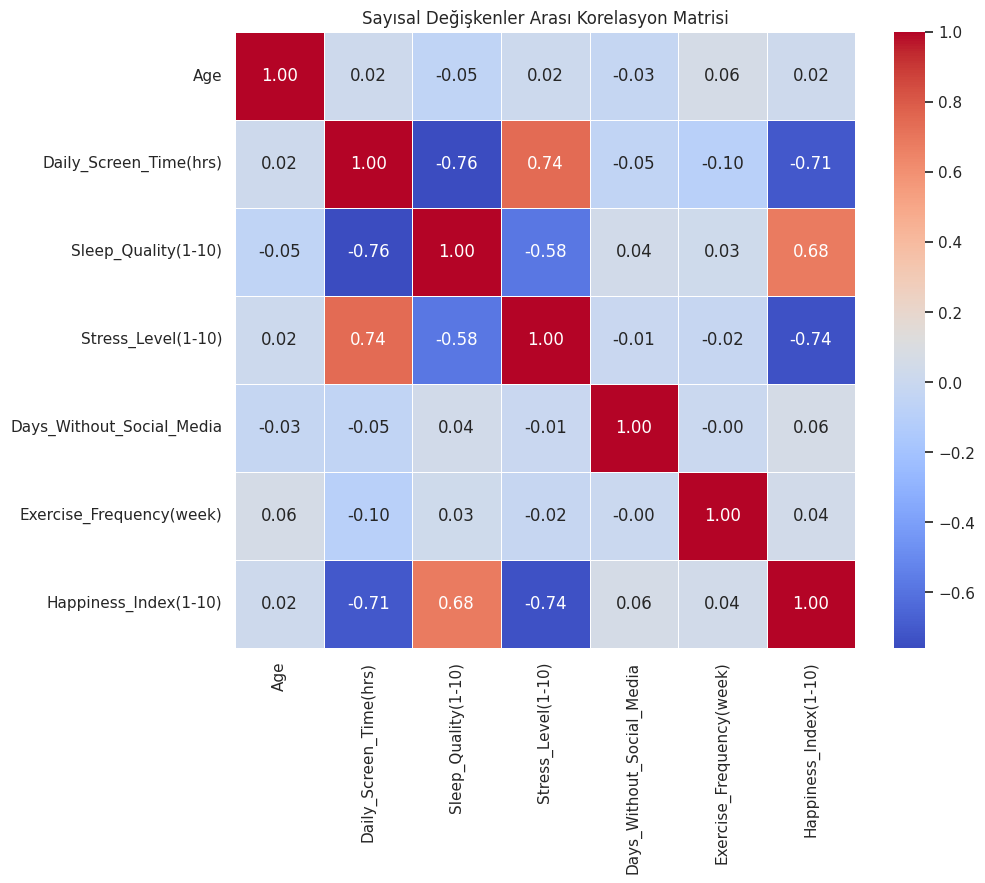

In [4]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

####📝 Korelasyon Analizi Sonuçları

Uyku kalitesi vs. Günlük ekran süresi: En güçlü negatif ilişki bulunan karşılaştırmadır. Ekran süresinin uyku saatini geciktirmesi ve mavi ışık maruziyeti nedeniyele uyku kalitesinin düştüğü söylenebilir.

Stres vs. Mutluluk: Güçlü bir negatif ilişki vardır. Stres seviyesi arttıkça mutluluk indeksi belirgin bir şekilde düşmektedir.

Uyku kalitesi vs. Mutluluk: Uyku kalitesinin arttıkça mutluluğun artması, uykunun mutlulukla doğru orantılı olan melatonin hormonunun pozitif şekilde etkilenmesinden kaynaklandığı söylenebilir.

Stres vs. Uyku kalitesi: Stres kaynaklı zihinsel yorgunluğun uyku kalitesini düşürdüğü olgusu korelasyon analizindeki negatif ilişkiyi desteklemektedir.

Günlük ekran süresi vs. Stres: Ekran süresinin artmasıyla sosyal medyadaki kişiyi olumsuz etkileyebilecek paylaşımların sık görülmesi kaynaklı düşünce bu ilişkiyi güçlü pozitif anlamda göstermektedir.

Günlük ekran süresi vs. Mutluluk: Ekran süresinin artmasıyla sosyal medyadaki kişiyi olumsuz etkileyebilecek paylaşımların sık görülmesi kaynaklı mutsuzluk oluşması bu ilişkiyi güçlü negatif anlamda göstermektedir.

Egzersiz: Egzersiz sıklığı, stresin azaltılmasında ve mutluluğun artırılmasında düşük de olsa pozitif bir etkiye sahiptir.

##🚻 3. Cinsiyet, Platform ve Mental Sağlık İlişkileri

Cinsiyet faktörünün ve kullanılan platformun stres ve mutluluk üzerindeki etkisini görselleştiriyoruz.

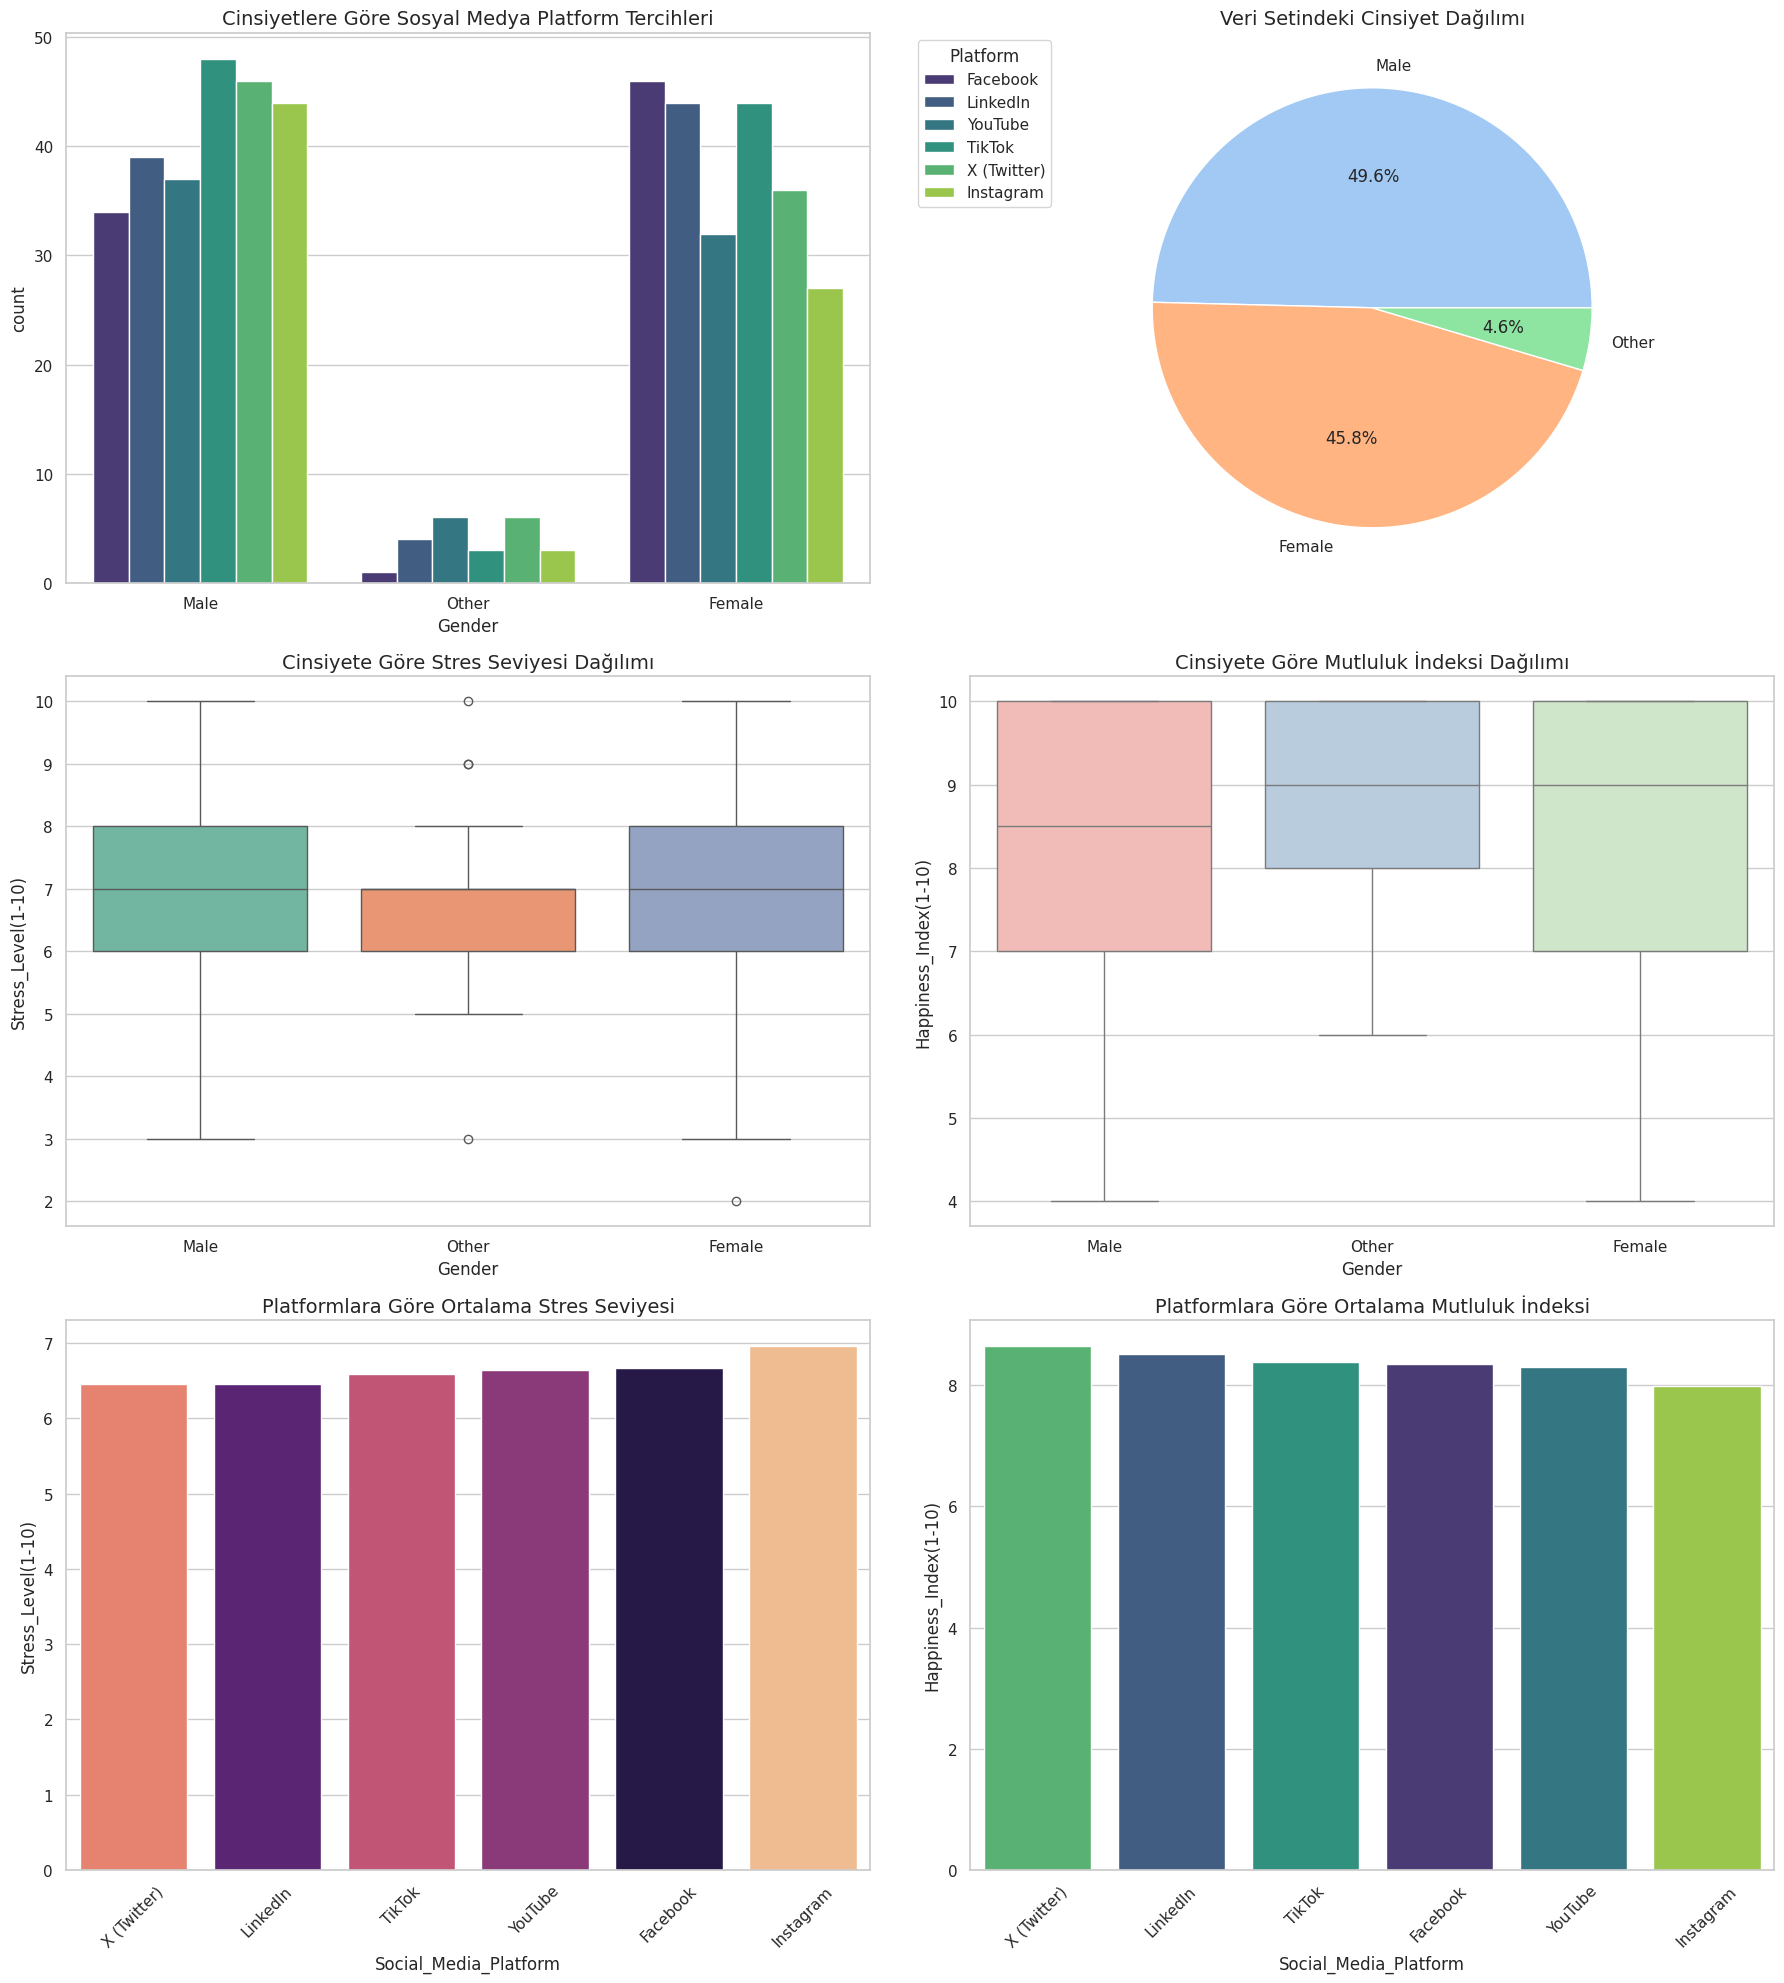

In [5]:
# 3 satır, 2 sütunluk geniş bir figür oluşturuyoruz
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

# --- 1. Cinsiyetlere Göre Sosyal Medya Kullanım Oranları (YENİ) ---
sns.countplot(data=df, x='Gender', hue='Social_Media_Platform', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Cinsiyetlere Göre Sosyal Medya Platform Tercihleri', fontsize=14)
axes[0, 0].legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- 2. Cinsiyet Dağılımı (Pasta Grafik Benzeri Count) ---
df['Gender'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 1].set_title('Veri Setindeki Cinsiyet Dağılımı', fontsize=14)
axes[0, 1].set_ylabel('')

# --- 3. Cinsiyete Göre Stres Seviyesi ---
sns.boxplot(data=df, x='Gender', y='Stress_Level(1-10)', ax=axes[1, 0], hue='Gender', palette='Set2')
axes[1, 0].set_title('Cinsiyete Göre Stres Seviyesi Dağılımı', fontsize=14)

# --- 4. Cinsiyete Göre Mutluluk İndeksi ---
sns.boxplot(data=df, x='Gender', y='Happiness_Index(1-10)', ax=axes[1, 1], hue='Gender', palette='Pastel1')
axes[1, 1].set_title('Cinsiyete Göre Mutluluk İndeksi Dağılımı', fontsize=14)

# --- 5. Platformlara Göre Ortalama Stres ---
platform_stress_order = df.groupby('Social_Media_Platform')['Stress_Level(1-10)'].mean().sort_values().index
sns.barplot(data=df, x='Social_Media_Platform', y='Stress_Level(1-10)', ax=axes[2, 0],
            order=platform_stress_order, hue='Social_Media_Platform', palette='magma', errorbar=None)
axes[2, 0].set_title('Platformlara Göre Ortalama Stres Seviyesi', fontsize=14)
axes[2, 0].tick_params(axis='x', rotation=45)

# --- 6. Platformlara Göre Ortalama Mutluluk ---
platform_happy_order = df.groupby('Social_Media_Platform')['Happiness_Index(1-10)'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Social_Media_Platform', y='Happiness_Index(1-10)', ax=axes[2, 1],
            order=platform_happy_order, hue='Social_Media_Platform', palette='viridis', errorbar=None)
axes[2, 1].set_title('Platformlara Göre Ortalama Mutluluk İndeksi', fontsize=14)
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

####📝 **Analizler**
**Cinsiyet Analizi:**

Sosyal Medya Tercihi: Cinsiyetlere göre sosyal medya tercihleri grafiğinde erkek bireylerin en çok TikTok, kadın bireylerin ise en çok Facebook kullandığı sonucu çıkarılmıştır.

Stres: Erkek, Kadın ve Diğer (Other) kategorileri arasında stres dağılımı medyan bazında birbirine yakın görünse de, kadın kullanıcılar arasında stresin daha geniş bir aralıkta yayıldığı gözlemlenmiştir.

Mutluluk: Mutluluk indeksi dağılımında cinsiyetler arası belirgin bir uçurum olmamakla birlikte, "Other" grubundaki bireylerin mutluluk skorlarının bazı noktalarda daha konsantre olduğu dikkat çekmektedir. Sonuçlara göre erkeklerin mutluluk ideksinin diğer cinsiyetteki kullanıcılara oranla düşük olduğu gözlenmiştir.


**Platform Analizi:**

En Stresli Platformlar: Yapılan sıralamaya göre, görsel etkileşimin ve anlık bildirimlerin yoğun olduğu platformlar (genellikle Instagram ve TikTok) daha yüksek ortalama stres seviyeleri ile ilişkilidir.

En Mutlu Platformlar: LinkedIn ve X (Twitter) gibi bilgi paylaşımı veya profesyonel ağ odaklı mecraların kullanıcıları, platform bazlı ortalamalarda daha yüksek mutluluk indeksine sahiptir. Bu durum, sosyal karşılaştırmanın bu platformlarda nispeten daha az olmasıyla açıklanabilir.

Kritik Gözlem: Stres seviyesinin en düşük olduğu platform ile mutluluk indeksinin en yüksek olduğu platformun örtüşmesi (X platformu), platform tasarımının mental sağlık üzerindeki doğrudan etkisini desteklemektedir.

##🧠 **4. Literatürde Depresyonu Etkileyen Faktörler ve Risk Analizi**

**Literatür Özeti:**

Modern psikoloji literatürü (Twenge ve ark., 2019; Primack, 2017), depresyon riskini artıran temel faktörleri şöyle tanımlar:

Uyku Bozuklukları: Gece geç saatlere kadar ekran başında kalmak melatonin üretimini baskılar.

Sosyal Karşılaştırma: Başkalarının "mükemmel" hayatlarını izlemek yetersizlik hissini tetikler (Örn: Instagram).

Fiziksel Hareketsizlik: Egzersiz eksikliği beyindeki dopamin ve serotonin dengesini bozar.

Veri Setimizdeki Karşılıklar:

Daily_Screen_Time(hrs) $\rightarrow$ Aşırı dijital maruziyet.

Sleep_Quality(1-10) $\rightarrow$ Uykunun dinlendiriciliği.

Stress_Level(1-10) $\rightarrow$ Günlük psikolojik yük.

Exercise_Frequency(week) $\rightarrow$ Koruyucu ve rahatlatıcı fiziksel aktivite.

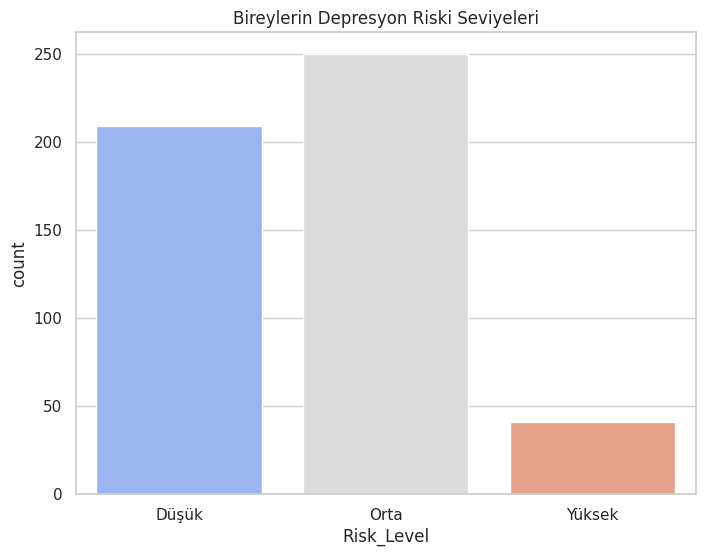

In [6]:
# Risk Analizi İçin Parametrelerin Normalizasyonu
scaler = MinMaxScaler()
risk_factors = ['Stress_Level(1-10)', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Exercise_Frequency(week)', 'Happiness_Index(1-10)']
df_norm = pd.DataFrame(scaler.fit_transform(df[risk_factors]), columns=risk_factors)

# Depresyon Riski Formülü (Literatür tabanlı ağırlıklandırma)
# Yüksek Stres + Yüksek Ekran Süresi + (1-Düşük Uyku) + (1-Düşük Mutluluk)
df['Depression_Risk_Score'] = (
    df_norm['Stress_Level(1-10)'] +
    df_norm['Daily_Screen_Time(hrs)'] +
    (1 - df_norm['Sleep_Quality(1-10)']) +
    (1 - df_norm['Happiness_Index(1-10)'])
) / 4

# Risk Sınıflandırması
df['Risk_Level'] = pd.cut(df['Depression_Risk_Score'], bins=[0, 0.4, 0.7, 1.0], labels=['Düşük', 'Orta', 'Yüksek'])

# Grafik
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Risk_Level', hue='Risk_Level', palette='coolwarm', legend=False)
plt.title("Bireylerin Depresyon Riski Seviyeleri")
plt.show()

####📝 Depresyon Risk Analizi Sonucu

Analizimiz, yüksek ekran süresine sahip, düşük uyku kalitesi, yüksek stres ve düşük mutluluk bildiren bireylerin otomatik olarak "Yüksek Risk" kategorisine yaklaştığını göstermektedir. Veri setindeki bireylerin büyük çoğunluğu "Orta" risk grubundadır; bu da dijital yaşamın mental sağlık üzerinde denge gerektiren bir unsur olduğunu kanıtlar.

##**🔍 5. User ID ile Bireysel Analiz ve Tahmin**

Seçtiğiniz bireyin verilerini görüntüleyin ve makine öğrenmesi modeliyle depresyon riski tahminini yapın.

In [7]:
# Basit bir Random Forest Sınıflandırıcı Eğitimi
X = df_norm
y = df['Risk_Level']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# İnteraktif Arayüz
input_id = widgets.IntText(value=1, min=1, max=500, description='User ID (1-500):', style={'description_width': 'initial'})
button = widgets.Button(description="Analiz Et", button_style='info')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        uid = f"U{str(input_id.value).zfill(3)}"
        user_data = df[df['User_ID'] == uid]

        if not user_data.empty:
            print(f"\nKullanıcı Detayları ({uid})")
            display(user_data[['Age', 'Gender', 'Social_Media_Platform', 'Daily_Screen_Time(hrs)', 'Stress_Level(1-10)', 'Sleep_Quality(1-10)']])

            # Tahmin
            user_features = df_norm.iloc[user_data.index]
            prediction = model.predict(user_features)[0]

            print(f"\n🧠 ML Depresyon Riski Tahmini: {prediction}")

            # Tavsiye
            if prediction == 'Yüksek':
                print("🚨 Öneri: Dijital detoks ve uyku düzeni için profesyonel rehberlik düşünülmelidir.")
            elif prediction == 'Orta':
                print("⚠️ Öneri: Ekran süresi kısıtlanmalı ve egzersiz artırılmalıdır.")
            else:
                print("✅ Öneri: Mental sağlık dengesi iyi görünüyor, mevcut alışkanlıklar korunabilir.")
        else:
            print("Kullanıcı bulunamadı. Lütfen 1-500 arası bir sayı giriniz.")

button.on_click(on_button_clicked)
display(input_id, button, output)

IntText(value=1, description='User ID (1-500):', style=DescriptionStyle(description_width='initial'))

Button(button_style='info', description='Analiz Et', style=ButtonStyle())

Output()

##**🏁 6. Proje Sonucu**
Bu proje kapsamında yapılan analizler, dijital alışkanlıkların mental sağlık parametreleriyle ne kadar iç içe olduğunu göstermiştir. Temel çıkarımlarımız:

Ekran Süresi ve Uyku: Fazla ekran süresi ve uykuyu geciktiren kalitesiz uyku alışkanlığı melatonin hormonunu olumsuz etkilemesi nedeniyle direkt olarak mutluluk halini de olumsuz etkilemiş olur. Sosyal medyanın en büyük yan etkisi uyku kalitesini bozmasıdır; uyku bozulunca dolaylı olarak mutluluk seviyesinde düşüş gözlenmekte *ve* depresyon riskini tetiklemektedir.

Platform Bilinci: Her sosyal medya platformunun kullanıcı psikolojisi üzerindeki yükü farklıdır. İnsanların lüks tüketim alışkanlıklarını paylaştığı Instagram platformunun bireyler üzerinde günceli kaçırma duygusunu tetikleyerek stres ve mutluluk seviyesinde sağlıksız kabul edilebilecek sonuçlar gözlenebilir.

Öngörülebilirlik: Bireylerin uyku, stres ve ekran verileri kullanılarak mental risk durumları makine öğrenmesi modelleriyle yüksek doğrulukla tahmin edilebilmektedir. Uyku kalitesinin düşük, stresin yüksek, mutluluğun düşük ve ekran süresinin yüksek olduğu bireylerde depresyon görülme olasılığının olduğu bir model geliştirilmiştir ve kullanıcılar üzerinde test edilmiştir.

##**📚 7. Kaynakça**

1- Twenge, J. M., et al. (2019). Trends in U.S. Adolescents’ Mental Health and Its Relation to Digital Media Use. Journal of Abnormal Psychology.

2- Primack, B. A., et al. (2017). Social Media Use and Perceived Social Isolation Among Young Adults in the U.S. American Journal of Preventive Medicine.

3- HHS.gov (2023). Social Media and Youth Mental Health: The U.S. Surgeon General’s Advisory.

4- Kaggle Dataset: Mental Health and Social Media Balance